In [2]:
!pip3 install pandas

  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)


In [3]:
import pandas as pd

In [4]:
df_st = pd.read_csv('./data/stations.csv')
df_st.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [5]:
import os 
import glob

def get_files(dir):
    return glob.glob(os.path.join(dir, '*.csv'))

In [7]:
def obtener_nombres_columnas(archivo_csv):
    df = pd.read_csv(archivo_csv)
    return df.columns.tolist()

def encontrar_columnas_comunes(lista_columnas):
    columnas_comunes = set(lista_columnas[0])
    for columnas in lista_columnas[1:]:
        columnas_comunes.intersection_update(columnas)
    return list(columnas_comunes)

In [8]:
DIR = './data/stations/'

files = get_files(DIR)
print(files)

['./data/stations/madrid_2005.csv', './data/stations/madrid_2012.csv', './data/stations/madrid_2007.csv', './data/stations/madrid_2011.csv', './data/stations/madrid_2015.csv', './data/stations/madrid_2016.csv', './data/stations/madrid_2001.csv', './data/stations/madrid_2013.csv', './data/stations/madrid_2010.csv', './data/stations/madrid_2004.csv', './data/stations/madrid_2017.csv', './data/stations/madrid_2009.csv', './data/stations/madrid_2006.csv', './data/stations/madrid_2002.csv', './data/stations/madrid_2008.csv', './data/stations/madrid_2014.csv', './data/stations/madrid_2018.csv', './data/stations/madrid_2003.csv']


In [53]:
nombres_columnas_por_archivo = []

# Leer cada archivo .csv y almacenar los nombres de sus columnas
for archivo_csv in files:
    nombres_columnas = obtener_nombres_columnas(archivo_csv)
    print(nombres_columnas)
    nombres_columnas_por_archivo.append(nombres_columnas)

# Encontrar el subconjunto de columnas comunes a todos los archivos
columnas_comunes = encontrar_columnas_comunes(nombres_columnas_por_archivo)

print("Columnas comunes en todos los archivos:")
print(columnas_comunes)

['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25

In [13]:
stations_base_in_df = df_st['id'].to_list()
stations_base_in_df

[28079004,
 28079008,
 28079011,
 28079016,
 28079017,
 28079018,
 28079024,
 28079027,
 28079035,
 28079036,
 28079038,
 28079039,
 28079040,
 28079047,
 28079048,
 28079049,
 28079050,
 28079054,
 28079055,
 28079056,
 28079057,
 28079058,
 28079059,
 28079060]

In [17]:
def obtener_stations_unicos(archivo_csv):
    df = pd.read_csv(archivo_csv)
    return df['station'].unique().tolist()

def encontrar_stations_comunes(lista_stations):
    stations_comunes = set(lista_stations[0])
    for stations in lista_stations[1:]:
        stations_comunes.intersection_update(stations)
    return list(stations_comunes)

stations_unicos_por_archivo = []

# Obtener los stations únicos de cada archivo .csv y almacenarlos en una lista
for archivo_csv in files:
    stations_unicos = obtener_stations_unicos(archivo_csv)
    #print(stations_unicos)
    stations_unicos_por_archivo.append(stations_unicos)

# Encontrar el subconjunto de stations comunes a todos los archivos
stations_comunes = encontrar_stations_comunes(stations_unicos_por_archivo)

print("Stations comunes en todos los archivos:")
print(stations_comunes)

Stations comunes en todos los archivos:
[28079008, 28079040, 28079011, 28079016, 28079018, 28079036, 28079024, 28079004, 28079038, 28079039]


In [27]:
import gc 
gc.collect()

0

In [19]:
def filtrar_stations(df, stations_permitidos):
    return df[df['station'].isin(stations_permitidos)]

In [23]:
carpeta_salida = os.path.join('.', 'out')
os.makedirs(carpeta_salida, exist_ok=True)

In [24]:
# Filtrar y exportar los DataFrames
for archivo_csv in files:
    nombre_archivo = os.path.basename(archivo_csv)
    df = pd.read_csv(archivo_csv)
    filas_iniciales = len(df)
    
    df_filtrado = filtrar_stations(df, stations_base_in_df)
    filas_filtradas = len(df_filtrado)
    
    # Ruta para guardar el archivo en la carpeta de salida
    ruta_salida = os.path.join(carpeta_salida, nombre_archivo)
    
    # Exportar el DataFrame filtrado como un nuevo archivo .csv
    df_filtrado.to_csv(ruta_salida, index=False)
    
    print(f"Archivo: {nombre_archivo} - Filas iniciales: {filas_iniciales} - Filas filtradas: {filas_filtradas}")

print("Proceso completado. Los archivos filtrados han sido guardados en la carpeta 'out'.")

Archivo: madrid_2005.csv - Filas iniciales: 237000 - Filas filtradas: 112824
Archivo: madrid_2012.csv - Filas iniciales: 210720 - Filas filtradas: 210720
Archivo: madrid_2007.csv - Filas iniciales: 225120 - Filas filtradas: 94224
Archivo: madrid_2011.csv - Filas iniciales: 209928 - Filas filtradas: 209928
Archivo: madrid_2015.csv - Filas iniciales: 210096 - Filas filtradas: 210096
Archivo: madrid_2016.csv - Filas iniciales: 209496 - Filas filtradas: 209496
Archivo: madrid_2001.csv - Filas iniciales: 217872 - Filas filtradas: 96408
Archivo: madrid_2013.csv - Filas iniciales: 209880 - Filas filtradas: 209880
Archivo: madrid_2010.csv - Filas iniciales: 209448 - Filas filtradas: 191664
Archivo: madrid_2004.csv - Filas iniciales: 245496 - Filas filtradas: 113928
Archivo: madrid_2017.csv - Filas iniciales: 210120 - Filas filtradas: 210120
Archivo: madrid_2009.csv - Filas iniciales: 215688 - Filas filtradas: 103728
Archivo: madrid_2006.csv - Filas iniciales: 230568 - Filas filtradas: 103440
A

In [26]:
OUTPUT_DIR = './out/'

files_out = get_files(OUTPUT_DIR)
files_out

['./out/madrid_2005.csv',
 './out/madrid_2012.csv',
 './out/madrid_2007.csv',
 './out/madrid_2011.csv',
 './out/madrid_2015.csv',
 './out/madrid_2016.csv',
 './out/madrid_2001.csv',
 './out/madrid_2013.csv',
 './out/madrid_2010.csv',
 './out/madrid_2004.csv',
 './out/madrid_2017.csv',
 './out/madrid_2009.csv',
 './out/madrid_2006.csv',
 './out/madrid_2002.csv',
 './out/madrid_2008.csv',
 './out/madrid_2014.csv',
 './out/madrid_2018.csv',
 './out/madrid_2003.csv']

In [28]:
# Combinar todos los DataFrames en uno solo
dfs = []
for archivo_csv in files_out:
    df = pd.read_csv(archivo_csv)
    dfs.append(df)

df_completo = pd.concat(dfs)

# Crear la carpeta 'out' si no existe
carpeta_salida = os.path.join('.', 'out/2/')
os.makedirs(carpeta_salida, exist_ok=True)

# Crear un archivo .csv por estación
for station_id, df_station in df_completo.groupby('station'):
    nombre_archivo = f'station_{station_id}.csv'
    ruta_salida = os.path.join(carpeta_salida, nombre_archivo)
    df_station.to_csv(ruta_salida, index=False)

print("Proceso completado. Los archivos separados por estaciones han sido guardados en la carpeta 'out'.")

Proceso completado. Los archivos separados por estaciones han sido guardados en la carpeta 'out'.


In [30]:
!pip3 install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)


In [39]:
import matplotlib.pyplot as plt 

In [54]:
df = pd.read_csv('./out/2/station_28079004.csv', parse_dates=['date'], index_col='date')
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station,NO,CH4
date,,,,,,,,,,,,,,,,,,
2005-11-01 01:00:00,NaN,0.42,NaN,NaN,NaN,37.220001,52.009998,NaN,21.379999,15.160000,NaN,NaN,6.60,NaN,NaN,28079004,NaN,NaN
2005-11-01 02:00:00,NaN,0.38,NaN,NaN,NaN,36.959999,49.919998,NaN,19.959999,17.940001,NaN,NaN,6.59,NaN,NaN,28079004,NaN,NaN
2005-11-01 03:00:00,NaN,0.36,NaN,NaN,NaN,33.270000,46.259998,NaN,20.440001,11.600000,NaN,NaN,6.47,NaN,NaN,28079004,NaN,NaN
2005-11-01 04:00:00,NaN,0.29,NaN,NaN,NaN,28.780001,31.780001,NaN,23.290001,2.800000,NaN,NaN,6.23,NaN,NaN,28079004,NaN,NaN
2005-11-01 05:00:00,NaN,0.25,NaN,NaN,NaN,19.309999,21.910000,NaN,26.629999,19.709999,NaN,NaN,6.05,NaN,NaN,28079004,NaN,NaN


In [55]:
df.columns

Index(['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10',
       'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4'],
      dtype='object')

In [56]:
df.isnull().sum()

BEN        151776
CO            563
EBE        151776
MXY        151776
NMHC       151776
NO_2          503
NOx         59456
OXY        151776
O_3         73256
PM10        73502
PM25       151776
PXY        151776
SO_2          465
TCH        151776
TOL        151776
station         0
NO          87746
CH4        151776
dtype: int64

<AxesSubplot:xlabel='date'>

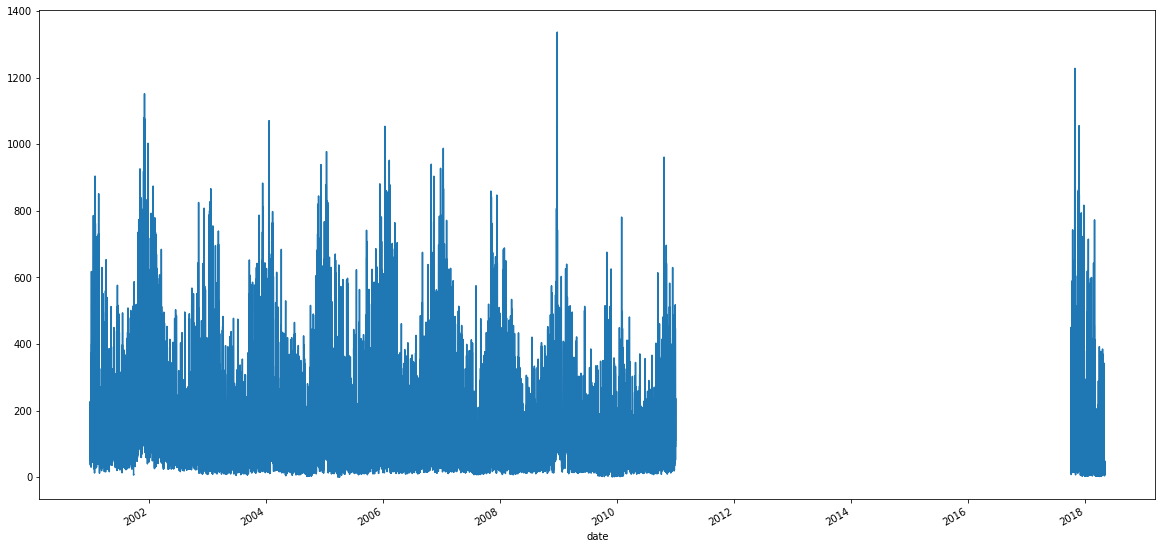

In [59]:
df['NOx'].plot(figsize=(20, 10))

In [51]:
OUTPUT_DIR_ST = './out/2/'

files_out = get_files(OUTPUT_DIR_ST)
files_out

['./out/2/station_28079057.csv',
 './out/2/station_28079055.csv',
 './out/2/station_28079039.csv',
 './out/2/station_28079058.csv',
 './out/2/station_28079056.csv',
 './out/2/station_28079060.csv',
 './out/2/station_28079024.csv',
 './out/2/station_28079040.csv',
 './out/2/station_28079049.csv',
 './out/2/station_28079036.csv',
 './out/2/station_28079035.csv',
 './out/2/station_28079004.csv',
 './out/2/station_28079050.csv',
 './out/2/station_28079054.csv',
 './out/2/station_28079016.csv',
 './out/2/station_28079011.csv',
 './out/2/station_28079048.csv',
 './out/2/station_28079038.csv',
 './out/2/station_28079018.csv',
 './out/2/station_28079059.csv',
 './out/2/station_28079027.csv',
 './out/2/station_28079008.csv',
 './out/2/station_28079047.csv',
 './out/2/station_28079017.csv']

In [61]:
for file in files_out:
    nombres_columnas = obtener_nombres_columnas(file)
    print(nombres_columnas)

['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date', 'BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'NO', 'CH4']
['date

In [60]:
df_station = pd.read_csv('./data/stations.csv')
df_station.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [62]:
contaminantes = ['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL']

In [65]:
# Agregar columnas para cada contaminante en df_stations
for contaminante in contaminantes:
    df_station[contaminante] = 0.0

# Iterar a través de los archivos por estaciones y calcular el porcentaje de NaN
for archivo_csv in files_out:
    nombre_archivo = os.path.basename(archivo_csv)
    station_id = nombre_archivo.split('_')[1].split('.')[0]
    
    df_estacion = pd.read_csv(archivo_csv)
    
    for contaminante in contaminantes:
        porcentaje_nan = df_estacion[contaminante].isnull().mean() * 100
        df_station.loc[df_station['id'] == int(station_id), contaminante] = porcentaje_nan

# Exportar el nuevo 'stations.csv' con las columnas de porcentaje de NaN
ruta_salida = os.path.join(carpeta_salida, 'new_stations.csv')
df_station.to_csv(ruta_salida, index=False)

print("Proceso completado. Se ha exportado el nuevo 'stations.csv'.")

Proceso completado. Se ha exportado el nuevo 'stations.csv'.


In [67]:
df_station_final = pd.read_csv('./out/2/new_stations.csv')
df_station_final.head()

,id,name,address,lon,lat,elevation,BEN,CO,EBE,MXY,...,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635,100.000000,0.370941,100.000000,100.0,...,0.331409,39.173519,100.0,48.265865,48.427946,100.000000,100.0,0.306373,100.000000,100.000000
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670,5.386511,0.607415,5.401553,100.0,...,0.848805,42.714601,100.0,1.280729,2.691107,47.235115,100.0,0.706263,16.004097,5.695949
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708,52.138323,48.292371,52.157421,100.0,...,0.417523,39.243191,100.0,48.382593,48.350983,100.000000,100.0,48.306201,52.834413,52.277936
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693,100.000000,0.391366,100.000000,100.0,...,0.320209,39.172860,100.0,0.424968,49.978916,100.000000,100.0,48.281019,100.000000,100.000000
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604,100.000000,66.039746,100.000000,100.0,...,0.571913,51.983794,100.0,1.155176,66.141031,100.000000,100.0,0.582390,100.000000,100.000000


In [68]:
import json

contaminantes_list = []
for _, row in df_station_final.iterrows():
    contaminantes = []
    for contaminante in df_station_final.columns[6:]:
        contaminantes.append({
            'name': contaminante,
            'percent_null': row[contaminante]
        })
    estacion = {
        'id': row['id'],
        'name': row['name'],
        'address': row['address'],
        'lon': row['lon'],
        'lat': row['lat'],
        'elevation': row['elevation'],
        'contaminantes': contaminantes
    }
    contaminantes_list.append(estacion)

# Convertir la lista de estaciones con contaminantes a JSON
json_data = json.dumps(contaminantes_list, indent=2)

# Guardar el JSON en un archivo
ruta_json = 'stations.json'
with open(ruta_json, 'w') as json_file:
    json_file.write(json_data)

print("Proceso completado. Se ha exportado el DataFrame a JSON con el formato deseado.")

Proceso completado. Se ha exportado el DataFrame a JSON con el formato deseado.
